# Przewidywanie chorób serca na podstawie innych czynników zdrowotnych

Zadaniem projektu jest porównanie popularnych modeli klasyfikacji nauczonych na zbiorze: ***Personal Key Indicators of Heart Disease*** autorstwa Kamila Pytlaka https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [85]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Ładowanie danych

In [86]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Opis danych

* ***HeartDisease*** - Badani, którzy oświadczyli, że mieli/mają chorobę wieńcową serca lub zawał mięśnia sercowego
* ***BMI*** - Body Mass Index
* ***Smoking*** - Badani, którzy wypalili co najmniej 100 papierosów w życiu
* ***AlcoholDrinking*** - Ludzie nadużywający alkoholu (mężczyźni, którzy piją co najmniej 14 drinków tygodniowo, kobiety - co najmniej 7 drinków tygodniowo)
* ***Stroke*** - Badani, którzy mieli udar
* ***PhysicalHealth*** - Przez ile dni w ciągu ostatnich 30 dni badany nie czuł się dobrze fizycznie
* ***MentalHealth*** - Przez ile dni w ciągu ostatnich 30 dni badany nie czuł się dobrze psychicznie
* ***DiffWalking*** - Czy badany ma trudności w chodzeniu lub we wchodzeniu po schodach
* ***Sex*** - Płeć badanego
* ***AgeCategory*** - Czternastostopniowa kategoria wiekowa badanego
* ***Race*** - Podana przez badanego rasa/pochodzenie etniczne
* ***Diabetic*** - Czy badany ma/miał cukrzycę?
* ***PhysicalActivity*** - Badani, którzy zadeklarowali uprawianie ćwiczeń fizycznych różnych od ich pracy w ciągu ostatnich 30 dni
* ***GenHealth*** - Poziom zdrowia zadeklarowany przez badanego
* ***SleepTime*** - Średnia długość snu badanego
* ***Asthma*** - Czy badany ma/miał astmę?
* ***KidneyDisease*** - Z wyłączeniem kamieni nerkowych, zapalenia pęcherza, niemożności trzymania moczu, czy badany ma/miał jakiekolwiek problemy z nerkami?
* ***SkinCancer*** - Czy badany ma/miał raka skóry?

Mamy zatem następujące dane kategoryczne: ***HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer, AgeCategory***

oraz ciągłe: ***BMI, PhysicalHealth, MentalHealth, SleepTime***

## Przetwarzanie danych

### Przyjrzyjmy się rozkładowi danych w kolumnach kategorycznych i przetwórzmy je na dane numeryczne

***HeartDisease***:

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


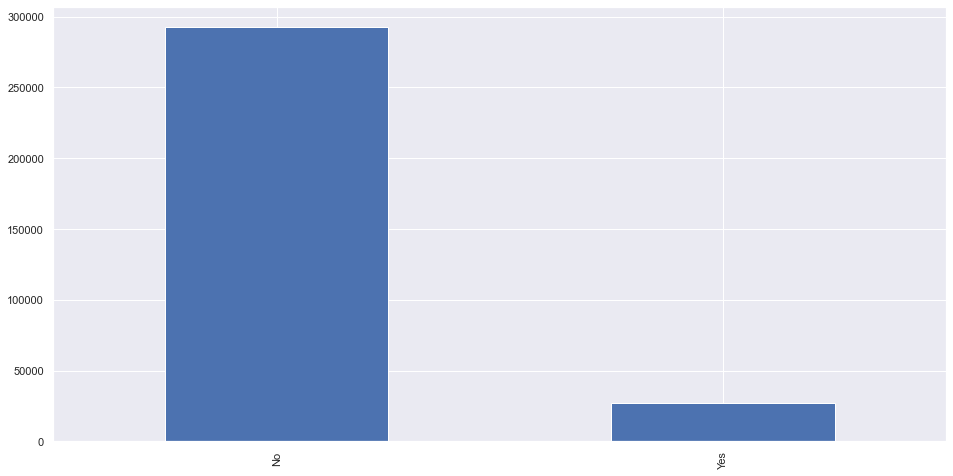

In [87]:
print(df['HeartDisease'].value_counts())
df['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

df['HeartDisease'] = df['HeartDisease'].replace({ 'Yes': 1, 'No': 0})

***Smoking:***

No     187887
Yes    131908
Name: Smoking, dtype: int64


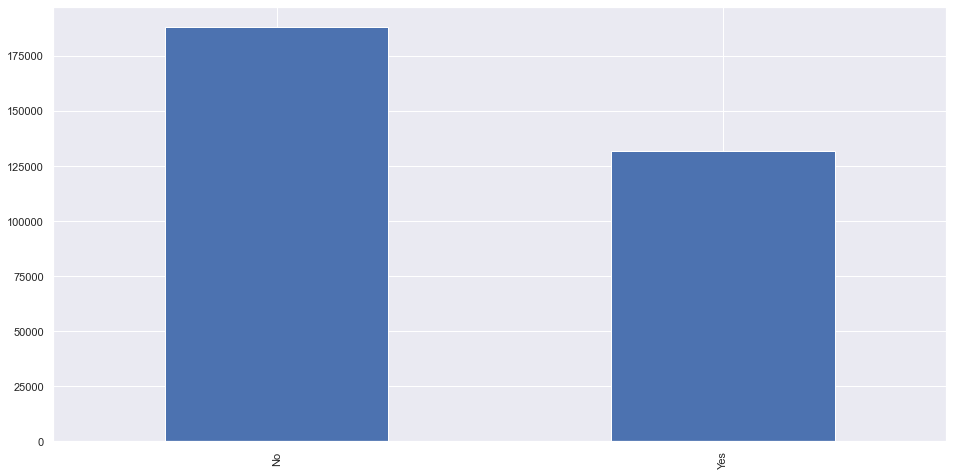

In [88]:
print(df['Smoking'].value_counts())
df['Smoking'].value_counts().plot(kind='bar')
plt.show()

df['Smoking'] = df['Smoking'].replace({ 'Yes': 1, 'No': 0})

***AlcoholDrinking:***

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


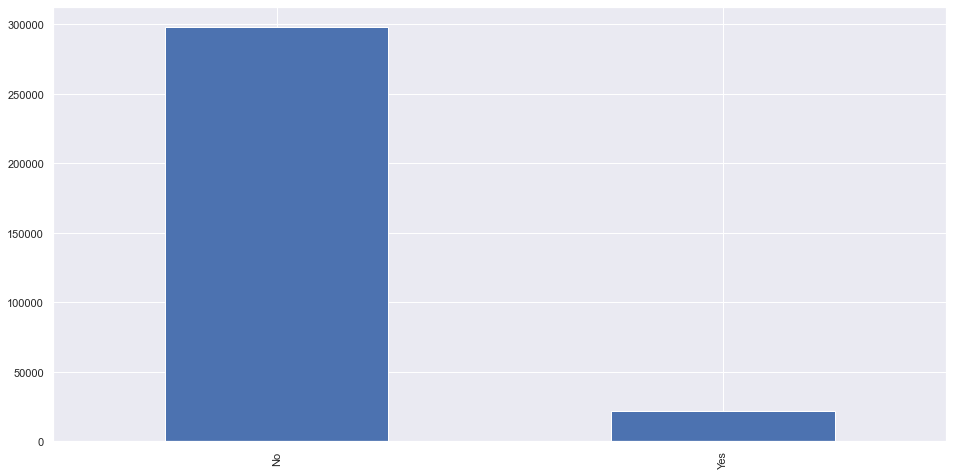

In [89]:
print(df['AlcoholDrinking'].value_counts())
df['AlcoholDrinking'].value_counts().plot(kind='bar')
plt.show()

df['AlcoholDrinking'] = df['AlcoholDrinking'].replace({ 'Yes': 1, 'No': 0})

***Stroke:***

No     307726
Yes     12069
Name: Stroke, dtype: int64


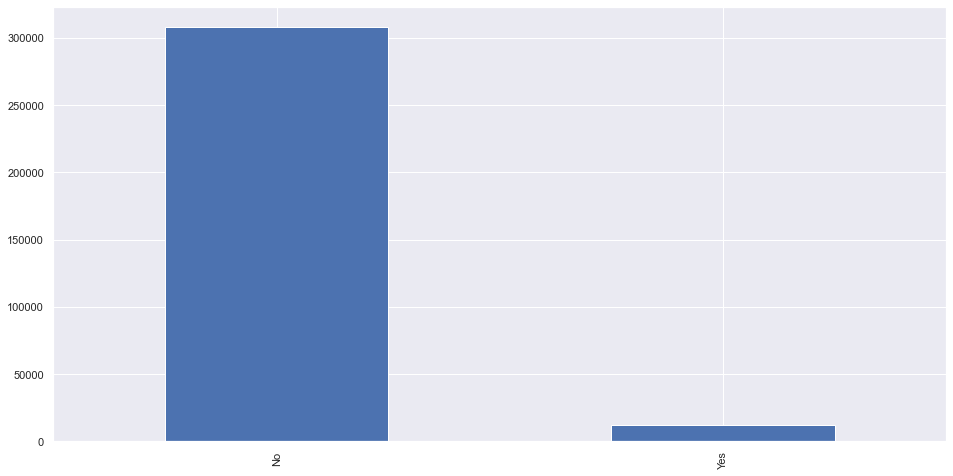

In [90]:
print(df['Stroke'].value_counts())
df['Stroke'].value_counts().plot(kind='bar')
plt.show()

df['Stroke'] = df['Stroke'].replace({ 'Yes': 1, 'No': 0})

***DiffWalking:***

No     275385
Yes     44410
Name: DiffWalking, dtype: int64


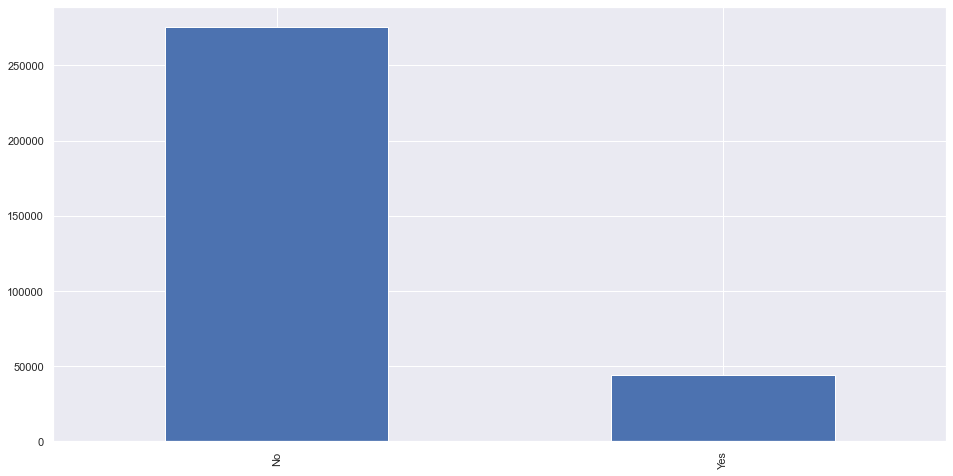

In [91]:
print(df['DiffWalking'].value_counts())
df['DiffWalking'].value_counts().plot(kind='bar')
plt.show()

df['DiffWalking'] = df['DiffWalking'].replace({ 'Yes': 1, 'No': 0})

***Sex:***

Female    167805
Male      151990
Name: Sex, dtype: int64


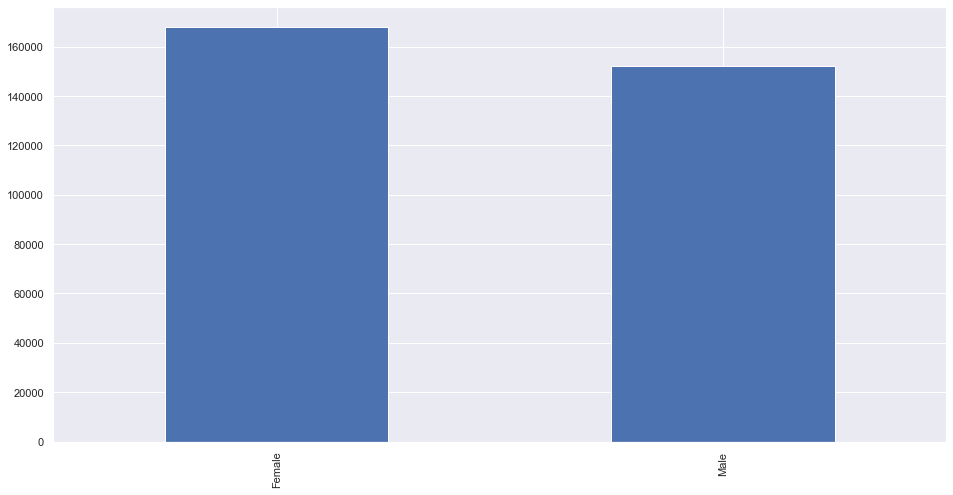

In [92]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='bar')
plt.show()

df['Sex'] = df['Sex'].replace({ 'Male': 1, 'Female': 0})

***Race:***

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


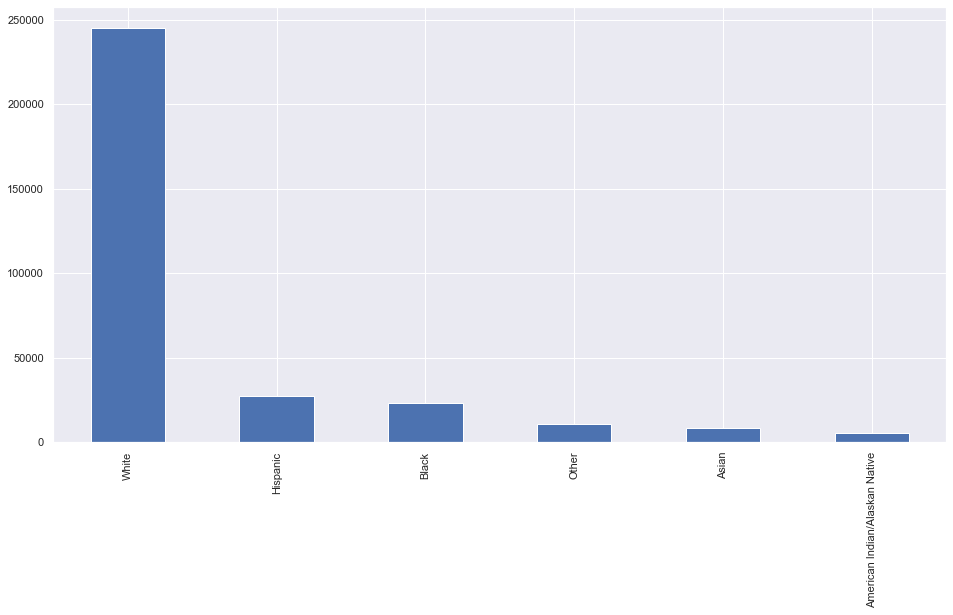

In [93]:
print(df['Race'].value_counts())
df['Race'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['Race'], prefix=['Race'])

***Diabetic:***

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


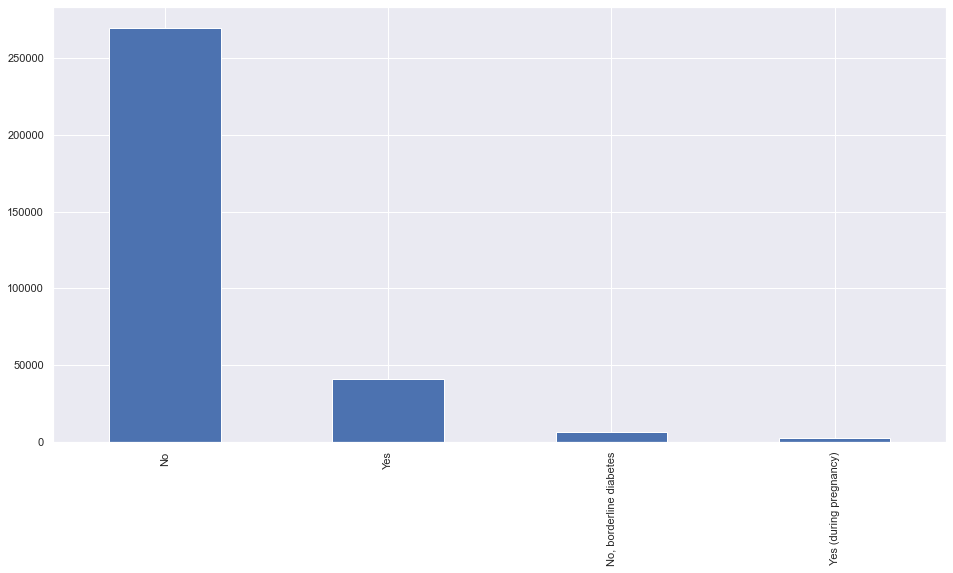

In [94]:
print(df['Diabetic'].value_counts())
df['Diabetic'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['Diabetic'], prefix=['Diabetic'])

***PhysicalActivity:***

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


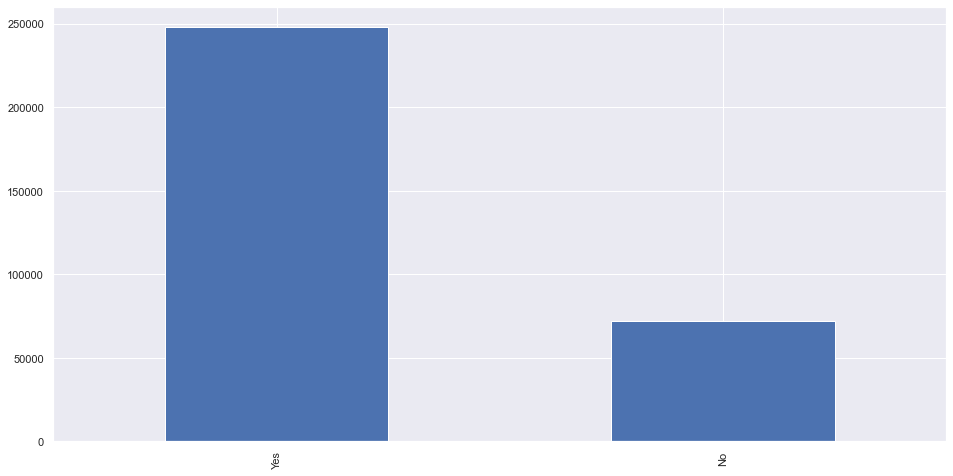

In [95]:
print(df['PhysicalActivity'].value_counts())
df['PhysicalActivity'].value_counts().plot(kind='bar')
plt.show()

df['PhysicalActivity'] = df['PhysicalActivity'].replace({ 'Yes': 1, 'No': 0})

***GenHealth:***

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


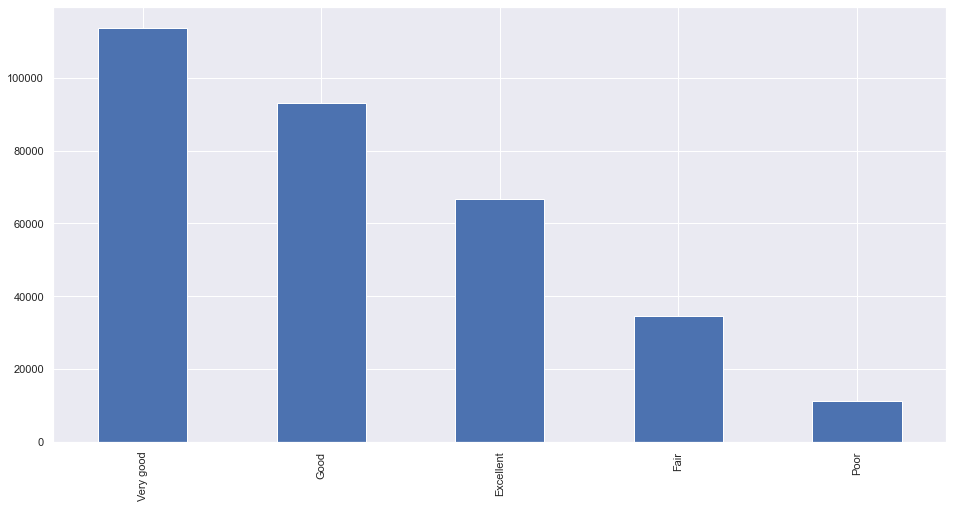

In [96]:
print(df['GenHealth'].value_counts())
df['GenHealth'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['GenHealth'], prefix=['GenHealth'])

***Asthma:***

No     276923
Yes     42872
Name: Asthma, dtype: int64


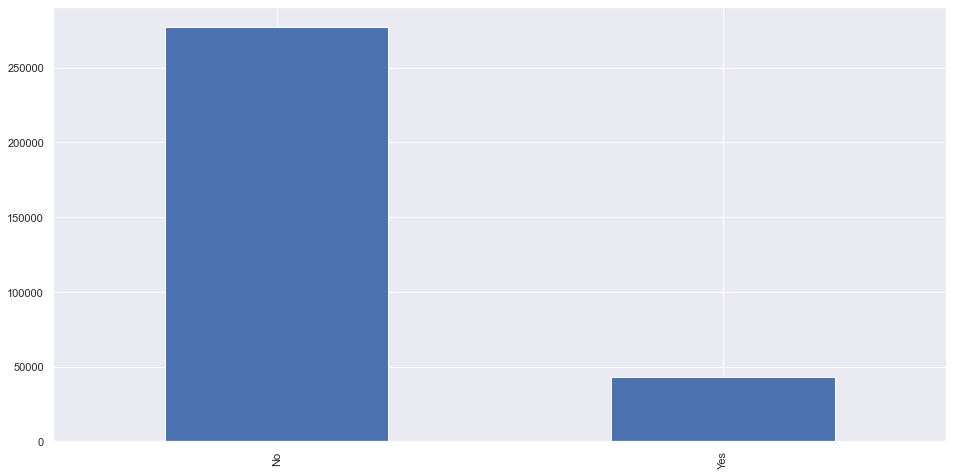

In [97]:
print(df['Asthma'].value_counts())
df['Asthma'].value_counts().plot(kind='bar')
plt.show()

df['Asthma'] = df['Asthma'].replace({ 'Yes': 1, 'No': 0})

***KidneyDisease:***

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


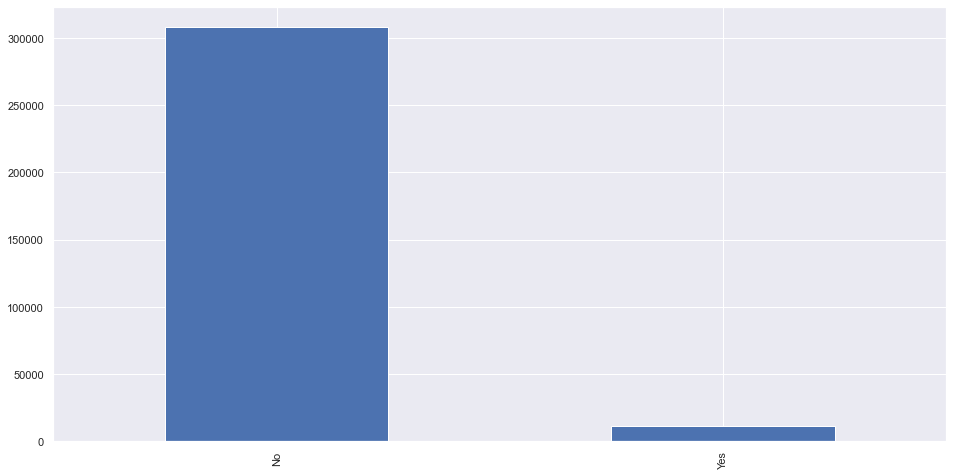

In [98]:
print(df['KidneyDisease'].value_counts())
df['KidneyDisease'].value_counts().plot(kind='bar')
plt.show()

df['KidneyDisease'] = df['KidneyDisease'].replace({ 'Yes': 1, 'No': 0})

***SkinCancer:***

No     289976
Yes     29819
Name: SkinCancer, dtype: int64


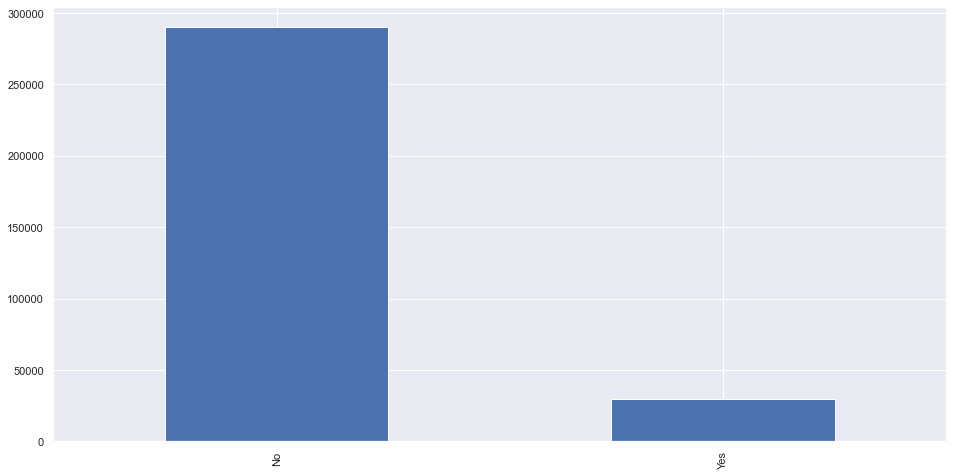

In [99]:
print(df['SkinCancer'].value_counts())
df['SkinCancer'].value_counts().plot(kind='bar')
plt.show()

df['SkinCancer'] = df['SkinCancer'].replace({ 'Yes': 1, 'No': 0})

***AgeCategory*** nie powinna być daną kategoryczną, więc zamieńmy każdą z kategorii na średni wiek tej kategorii:

In [100]:
ageCategory_dict = {'55-59': 57, '80 or older': 80, '65-69': 67,
                      '75-79': 77,'40-44': 42,'70-74': 72,'60-64': 62,
                      '50-54': 52,'45-49': 47,'18-24': 21,'35-39': 37,
                      '30-34': 32,'25-29': 27}

df['AgeCategory'] = df['AgeCategory'].apply(lambda val: ageCategory_dict[val])
df['AgeCategory'] = df['AgeCategory'].astype('float')

Wszystkie powyższe kolumny wydają się być na podstawie opisów odpowiednie do nauki klasyfikatorów. Należy jednak zwrócić uwagę, że dane są niezbalansowane. Poradzimy sobie z tym używając metody oversamplingu.

### Rozkład danych ciągłych:

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27.0,...,0,1,0,0,0,0,0,1,0,0


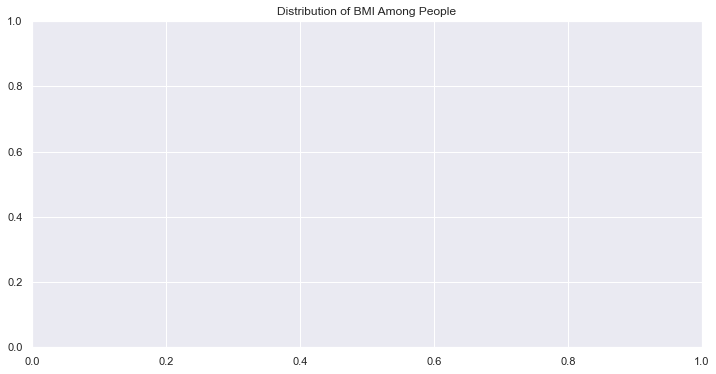

In [102]:
plt.figure(figsize=(12,6))

sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')
data

In [104]:
fig = px.imshow(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr())
fig.update_layout(height=800)
fig.show()

### Przygotowanie zbioru treningowego i walidacyjnego

Dzielimy zbiór danych w następujący sposób: 80% dane treningowe, 20% dane walidacyjne

In [110]:
train_df = df[:int(len(df)*0.8)]
val_df = df[int(len(df)*0.8):]

print('\nTrain:')
print(train_df['HeartDisease'].value_counts())

print('\nVal:')
print(val_df['HeartDisease'].value_counts())


Train:
0    233851
1     21985
Name: HeartDisease, dtype: int64

Val:
0    58571
1     5388
Name: HeartDisease, dtype: int64


Tak jak wspomniałem wyżej, dane nie są zbalansowane, zatem zoversamplujmy:

In [111]:
class_0 = train_df[train_df['HeartDisease'] == 0]
class_1 = train_df[train_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0    233851
1    233851
Name: HeartDisease, dtype: int64


In [112]:
class_0 = val_df[val_df['HeartDisease'] == 0]
class_1 = val_df[val_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_df['HeartDisease'].value_counts())

Data in Test:
0    58571
1    58571
Name: HeartDisease, dtype: int64


In [113]:
X_train = np.array(train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_train = np.array(train_df['HeartDisease'])

X_val = np.array(val_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_val = np.array(val_df['HeartDisease'])

# Modele treningowe

## Regresja logistyczna

In [129]:
lr = LogisticRegression(max_iter = 600)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

print(classification_report(y_val,y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     58571
           1       0.76      0.77      0.76     58571

    accuracy                           0.76    117142
   macro avg       0.76      0.76      0.76    117142
weighted avg       0.76      0.76      0.76    117142



## RandomForestClassifier

In [116]:
rf = RandomForestClassifier().fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70     58571
           1       0.83      0.22      0.35     58571

    accuracy                           0.59    117142
   macro avg       0.69      0.59      0.52    117142
weighted avg       0.69      0.59      0.52    117142



## K Nearest Neighbors

In [130]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70     58571
           1       0.83      0.22      0.35     58571

    accuracy                           0.59    117142
   macro avg       0.69      0.59      0.52    117142
weighted avg       0.69      0.59      0.52    117142



## SVM Poly

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)

print(classification_report(y_val,y_pred_rf))